In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Admission_Predict.csv',sep=',')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(400, 9)

In [7]:
df.columns=df.columns.str.rstrip()

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# replace values in in Chance of Admit column by 0 or 1 based on threshold value if 0.80> 1 put 1 else put 0
df.loc[df['Chance of Admit'] >=0.80,'Chance of Admit']=1
df.loc[df['Chance of Admit'] < 0.80,'Chance of Admit']=0

In [11]:
df['Chance of Admit']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [12]:
df=df.drop('Serial No.',axis=1)

In [13]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1.0
396,325,107,3,3.0,3.5,9.11,1,1.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,0.0


In [14]:
X = df.iloc[:,0:7].values
y=df.iloc[:,7].values

In [15]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [16]:
y

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)


In [18]:
print(X_train.shape,end='  ')
print(X_test.shape)

(300, 7)  (100, 7)


In [19]:
from sklearn.tree import DecisionTreeClassifier 


import matplotlib.pyplot as plt 

In [20]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
matrix=confusion_matrix(y_test,y_pred,labels=[0.0,1.0])

In [23]:
matrix

array([[64,  7],
       [ 5, 24]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree model =  ',acc)

Accuracy of Decision Tree model =   0.88


In [26]:
from sklearn.metrics import classification_report
cr =classification_report(y_test,y_pred)
print('Classification Report ', cr )

Classification Report                precision    recall  f1-score   support

         0.0       0.93      0.90      0.91        71
         1.0       0.77      0.83      0.80        29

    accuracy                           0.88       100
   macro avg       0.85      0.86      0.86       100
weighted avg       0.88      0.88      0.88       100



In [27]:
feature_names=df.columns[0:7]
print(feature_names,end=' ')
class_names=[str(x) for x in model.classes_]
class_names

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object') 

['0.0', '1.0']

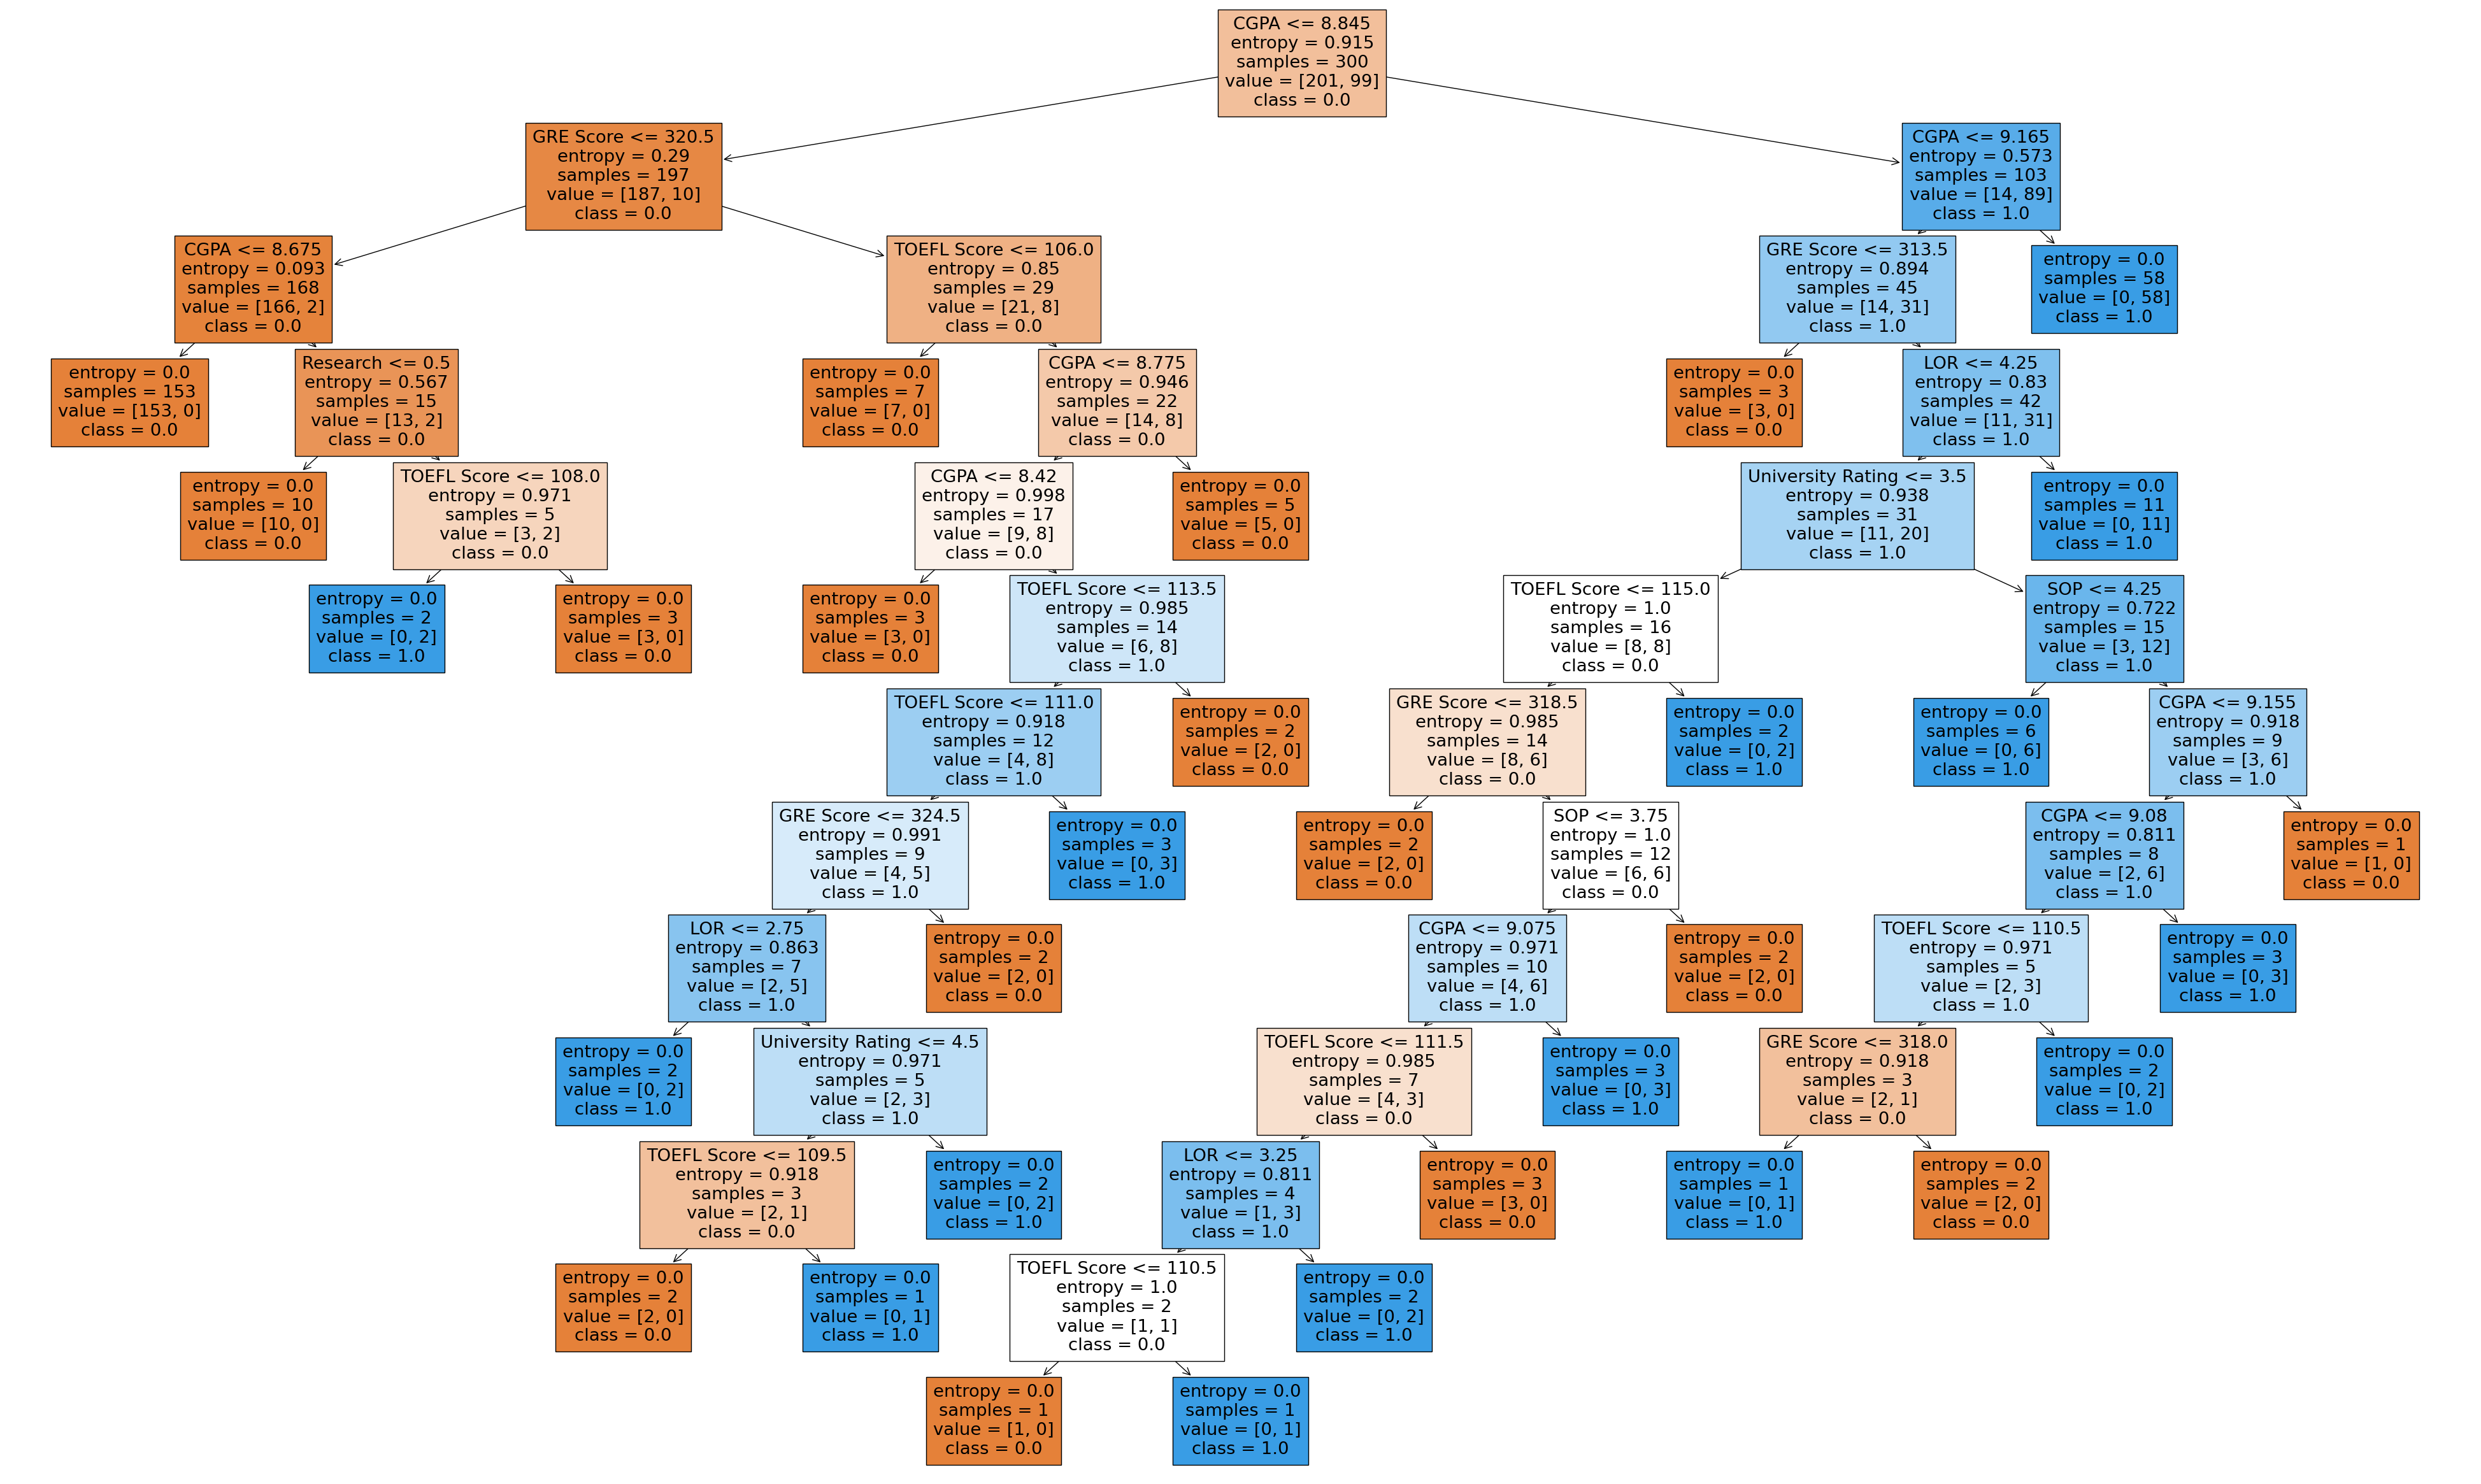

In [29]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(50,30))
plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
plt.savefig('tree_visualization.png')

In [30]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 667.8 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 396.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model,out_file=None, feature_names=feature_names, class_names=class_names,filled=True)
graph=graphviz.Source(dot_data,format="png")

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
sf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [ ]:
depth=[1,2,3,4,5,6,7,8,9,10]

for d in depth :
    score = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=d,random_state=0),X_train,y_train,cv=sf,scoring='accuracy')
    print("Average score for depth {} is {}  :".format(d,score.mean()))

In [ ]:
score.mean()

In [ ]:
maxdepth=[]
gini_acc=[]
entropy_acc=[]

for i in range(1,11):
    dtree=DecisionTreeClassifier(criteria='gini',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(y_test,pred)
    gini_acc.append(accuracy_score(y_test,y_pred))
    maxdepth.append(i)